<a href="https://colab.research.google.com/github/codewithAshwani/MNIST-Speech-classification/blob/main/DNN_Speech_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pickle import dump
from pickle import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
PICKLE_PATH = "feature.pkl"

In [2]:
def load_data(data_path):
     #Loads training dataset from data file.
     #   :return X (ndarray)
     #   :return y (ndarray)
    data = load(open(data_path, 'rb'))

    # convert lists to numpy arrays
    X = np.array(data["feauture_mfcc"])
    y = np.array(data["labels"])
#    y.astype(int)

    print("Data succesfully loaded!")

    return  X, y

In [3]:
# load data
X, y = load_data(PICKLE_PATH)

 # create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_validation = scaler.transform(X_validation.reshape(-1, X_validation.shape[-1])).reshape(X_validation.shape)
print(X_train.shape,y_train.shape)

Data succesfully loaded!
(1920, 55, 13) (1920,)


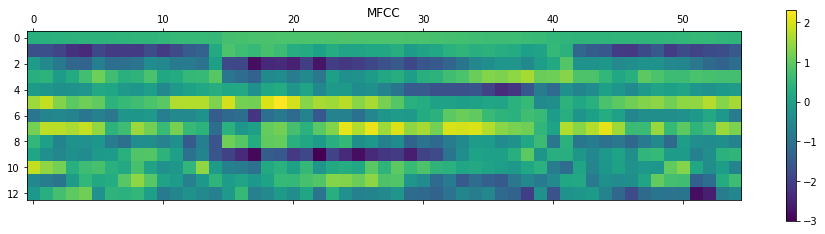

In [4]:
mfcc_features = X_train[2].T
plt.matshow(mfcc_features)
plt.title('MFCC')
plt.colorbar()

In [5]:
 # build network topology
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile model
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 715)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               183296    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 251,658
Trainable params: 251,658
Non-trainable params: 0
__________________________________________________

In [6]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=10, verbose=2)

Epoch 1/10
60/60 - 1s - loss: 1.5612 - accuracy: 0.6953 - val_loss: 0.8506 - val_accuracy: 0.9396
Epoch 2/10
60/60 - 0s - loss: 0.8538 - accuracy: 0.9276 - val_loss: 0.7435 - val_accuracy: 0.9688
Epoch 3/10
60/60 - 0s - loss: 0.7234 - accuracy: 0.9635 - val_loss: 0.7191 - val_accuracy: 0.9625
Epoch 4/10
60/60 - 0s - loss: 0.6797 - accuracy: 0.9641 - val_loss: 0.6768 - val_accuracy: 0.9604
Epoch 5/10
60/60 - 0s - loss: 0.6218 - accuracy: 0.9797 - val_loss: 0.6296 - val_accuracy: 0.9688
Epoch 6/10
60/60 - 0s - loss: 0.5724 - accuracy: 0.9854 - val_loss: 0.6141 - val_accuracy: 0.9708
Epoch 7/10
60/60 - 0s - loss: 0.5425 - accuracy: 0.9839 - val_loss: 0.6258 - val_accuracy: 0.9646
Epoch 8/10
60/60 - 0s - loss: 0.5126 - accuracy: 0.9844 - val_loss: 0.5901 - val_accuracy: 0.9729
Epoch 9/10
60/60 - 0s - loss: 0.4813 - accuracy: 0.9891 - val_loss: 0.5216 - val_accuracy: 0.9750
Epoch 10/10
60/60 - 0s - loss: 0.4520 - accuracy: 0.9917 - val_loss: 0.5115 - val_accuracy: 0.9667


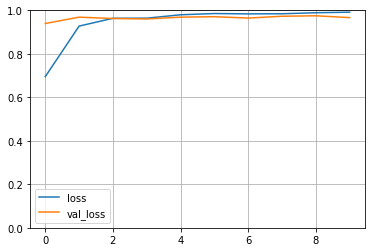

In [7]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.0, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [8]:
score, acc = model.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

19/19 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.9733
Test score: 0.5082686543464661
Test accuracy: 0.9733333587646484


In [9]:
y_predic = np.argmax(model.predict(X_test), axis=1)

In [10]:
print(y_predic[:35])
print(y_test[:35])

[9 9 5 8 5 4 3 2 8 1 4 9 0 4 3 7 7 7 9 4 5 5 6 2 3 0 4 4 4 1 3 6 4 7 5]
[9 9 5 8 5 4 3 2 8 1 4 9 0 4 0 7 7 7 9 4 5 9 6 2 3 0 4 4 4 1 3 6 4 7 5]


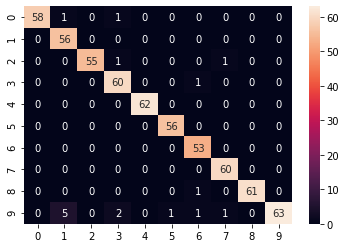

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predic)
sns.heatmap(cf_matrix, annot=True)